# 数据获取

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('./data/4.2/housing.csv')

In [3]:
housing.head()

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,房价中位数,靠海
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   经度      20640 non-null  float64
 1   纬度      20640 non-null  float64
 2   房龄中位数   20640 non-null  float64
 3   房间总数    20640 non-null  float64
 4   卧室总数    20433 non-null  float64
 5   人口数     20640 non-null  float64
 6   家庭数     20640 non-null  float64
 7   收入中位数   20640 non-null  float64
 8   房价中位数   20640 non-null  float64
 9   靠海      20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['靠海'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: 靠海, dtype: int64

In [6]:
housing.describe()

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,房价中位数
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


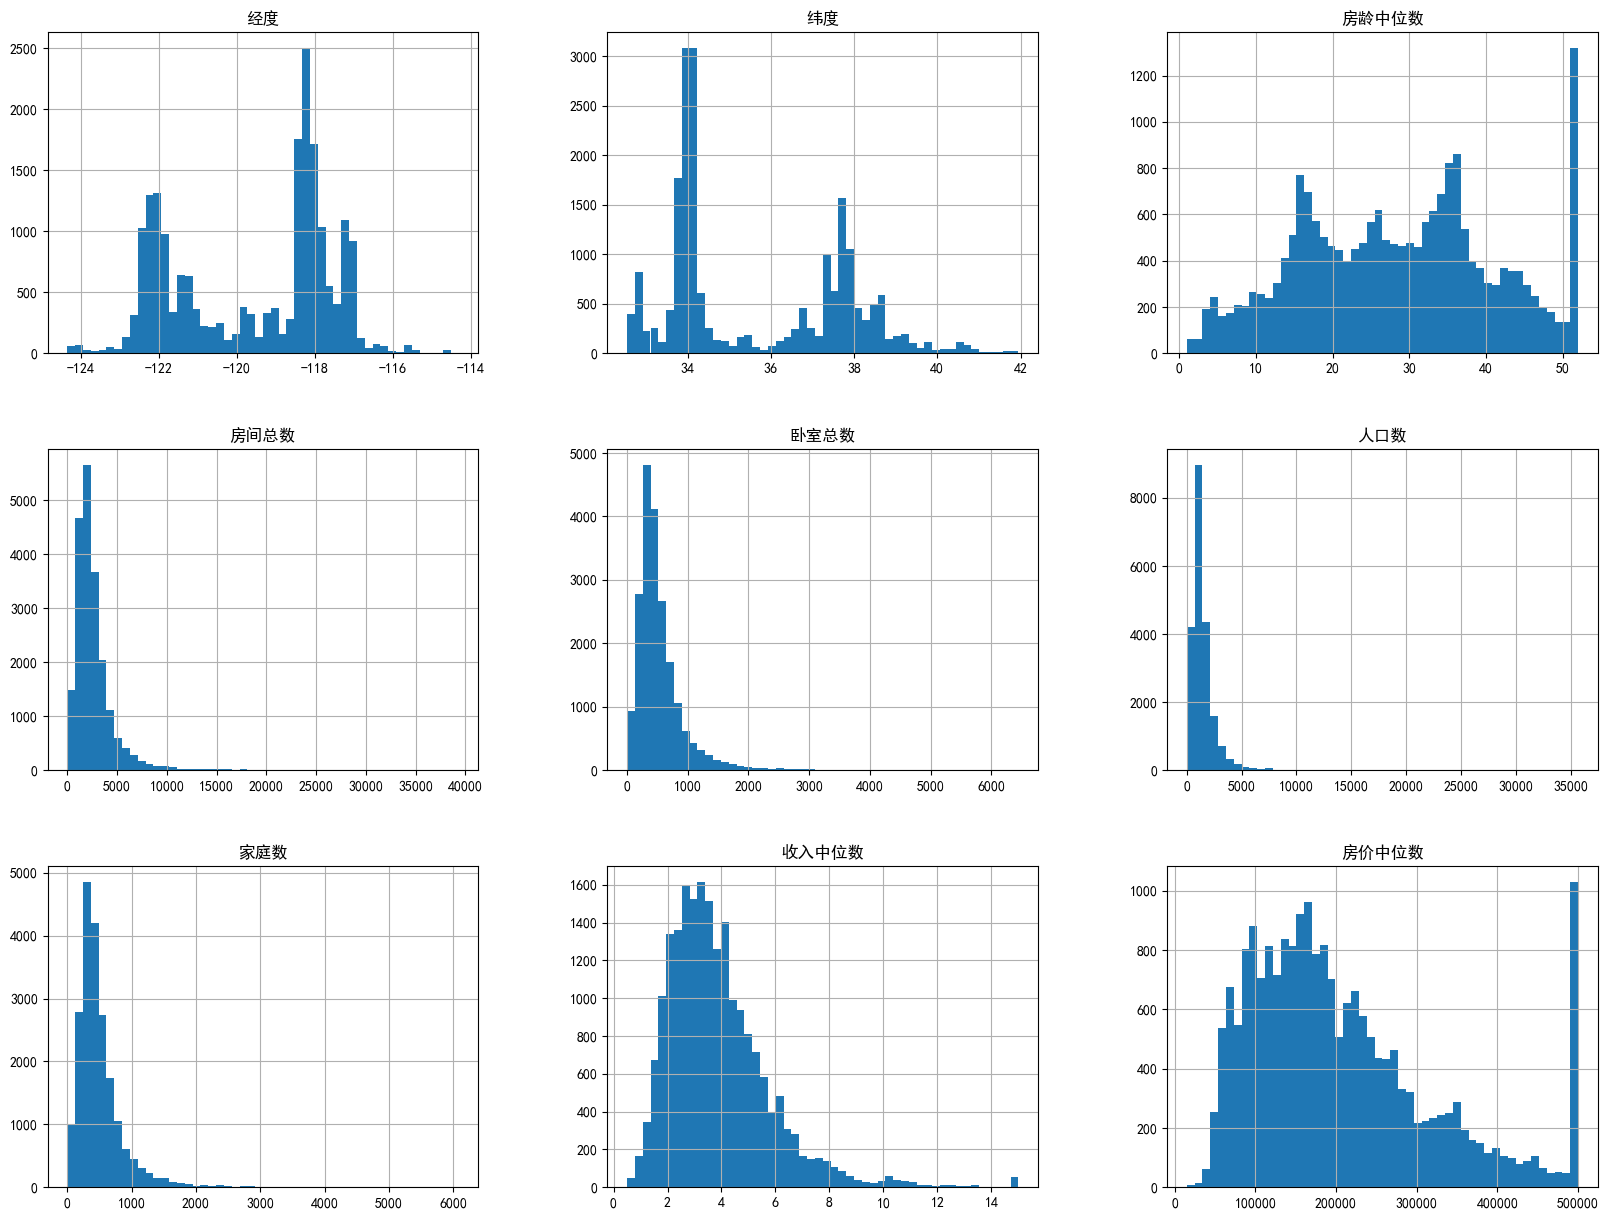

In [7]:
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False ##确保负号正常显示
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

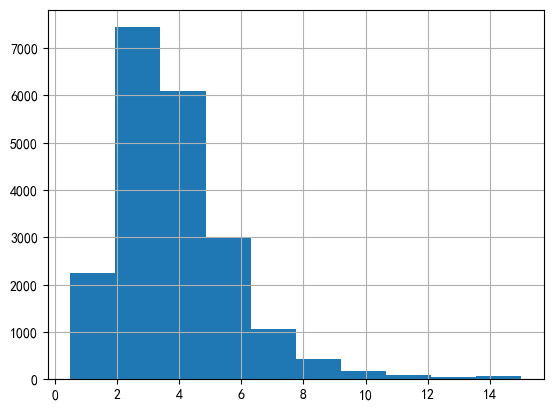

In [9]:
housing['收入中位数'].hist()
plt.show()

In [10]:
# Divide by 1.5 to limit the number of income categories
import numpy as np
housing["income_cat"]=np.ceil(housing['收入中位数']/1.5)  #返回上入整数
housing["income_cat"].head()

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

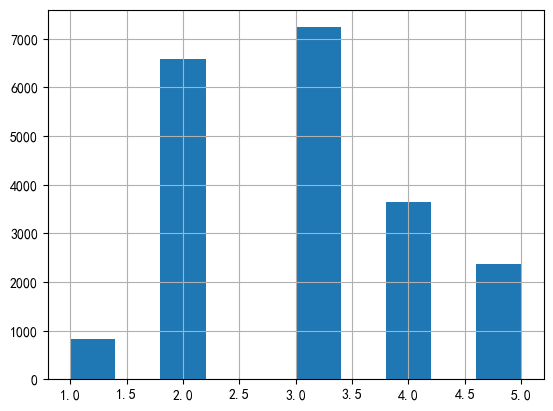

In [11]:
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
housing["income_cat"].hist()
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [14]:
len(strat_test_set)

4128

In [15]:
housing["income_cat"].value_counts()/len(housing)
# .value_counts():确认数据出现的频数

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
len(housing)

20640

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [18]:
strat_train_set

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,房价中位数,靠海
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [19]:
strat_test_set

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,房价中位数,靠海
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


# 数据探索

In [20]:
housing = strat_train_set.copy()

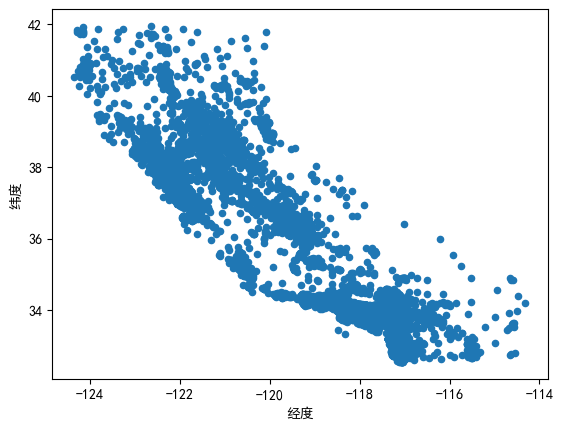

In [21]:
housing.plot(kind='scatter',x='经度',y='纬度')
plt.show()

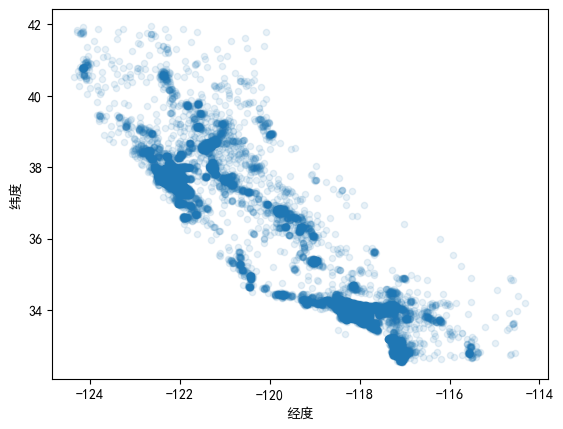

In [22]:
housing.plot(kind='scatter',x='经度',y='纬度',alpha=0.1)
plt.show()
# 颜色越深，表示叠加越多

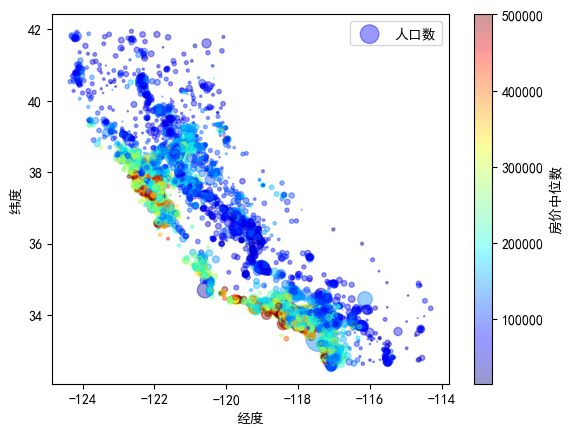

In [23]:
housing.plot(kind='scatter',x='经度',y='纬度',alpha=0.4,
             s=housing['人口数']/100,label='人口数',
             c='房价中位数',cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)

plt.legend()
plt.show()

In [24]:
corr_matrix=housing.corr()

In [25]:
corr_matrix['房价中位数'].sort_values(ascending=False)

房价中位数    1.000000
收入中位数    0.687151
房间总数     0.135140
房龄中位数    0.114146
家庭数      0.064590
卧室总数     0.047781
人口数     -0.026882
经度      -0.047466
纬度      -0.142673
Name: 房价中位数, dtype: float64

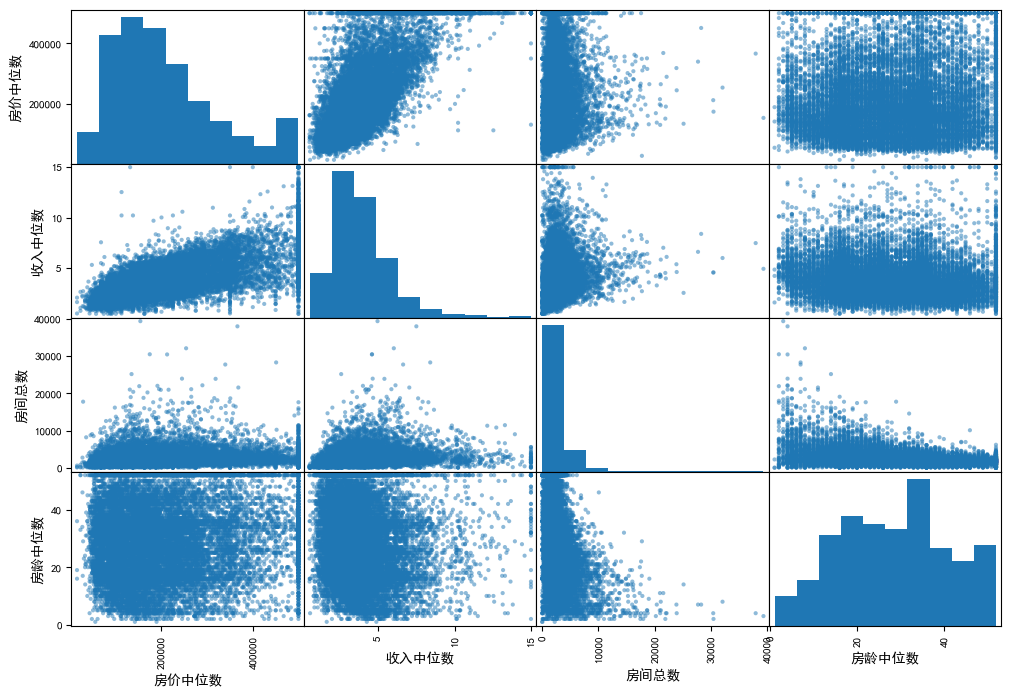

In [26]:
from pandas.plotting import scatter_matrix
attributes=['房价中位数','收入中位数','房间总数','房龄中位数']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

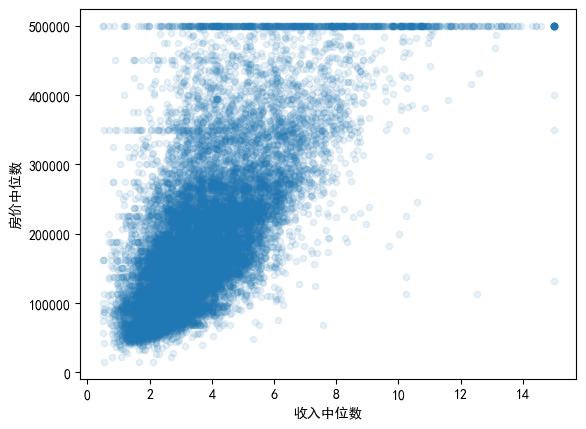

In [27]:
housing.plot(kind='scatter',x='收入中位数',y='房价中位数',alpha=0.1)
plt.show()

In [28]:
housing["roomes_per_household"]=housing['房间总数']/housing['家庭数']
housing["bedrooms_per_rooms"]=housing['卧室总数']/housing['房间总数']
housing["population_per_household"]=housing['人口数']/housing['家庭数']
corr_matrix=housing.corr()
corr_matrix['房价中位数'].sort_values(ascending=False)# False:降序

房价中位数                       1.000000
收入中位数                       0.687151
roomes_per_household        0.146255
房间总数                        0.135140
房龄中位数                       0.114146
家庭数                         0.064590
卧室总数                        0.047781
population_per_household   -0.021991
人口数                        -0.026882
经度                         -0.047466
纬度                         -0.142673
bedrooms_per_rooms         -0.259952
Name: 房价中位数, dtype: float64

# 数据准备

In [29]:
housing_labels=strat_train_set['房价中位数'].copy()
housing=strat_train_set.drop('房价中位数',axis=1)

In [30]:
housing.shape

(16512, 9)

In [31]:
housing

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,靠海
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [32]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: 房价中位数, Length: 16512, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
housing_num=housing.drop('靠海',axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X=imputer.transform(housing_num)

In [39]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [40]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [41]:
housing_num.columns

Index(['经度', '纬度', '房龄中位数', '房间总数', '卧室总数', '人口数', '家庭数', '收入中位数'], dtype='object')

In [42]:
housing_tr

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [43]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   经度      16512 non-null  float64
 1   纬度      16512 non-null  float64
 2   房龄中位数   16512 non-null  float64
 3   房间总数    16512 non-null  float64
 4   卧室总数    16512 non-null  float64
 5   人口数     16512 non-null  float64
 6   家庭数     16512 non-null  float64
 7   收入中位数   16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [44]:
housing_categories = housing['靠海'].factorize()

In [45]:
housing_categories[1]

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [46]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing['靠海'])

In [47]:
housing_cat=pd.DataFrame(housing_cat_1hot,columns=housing_categories[1],index=housing_num.index)

In [48]:
housing_cat

,INLAND,NEAR OCEAN,<1H OCEAN,NEAR BAY,ISLAND
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


In [49]:
housing = pd.concat([housing_tr,housing_cat[['<1H OCEAN','NEAR OCEAN','INLAND','NEAR BAY']]],axis=1)

In [50]:
housing

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0,1,0,0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0,0,0,0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0,1,0,0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0,0,0,0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0,0,1,0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0,1,0,0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0,0,1,0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0,0,1,0


In [51]:
housing.describe()

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,0.000121,0.318677,0.440710,0.111858
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,0.011005,0.465978,0.496487,0.315201
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,0.000000,0.000000,0.000000,0.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,0.000000,1.000000,1.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,1.000000,1.000000,1.000000,1.000000


In [52]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
housing['房间总数_s'] = s.fit_transform(housing[['房间总数']])
housing['卧室总数_s'] = s.fit_transform(housing[['卧室总数']])
housing['人口数_s'] = s.fit_transform(housing[['人口数']])
housing['家庭数_s'] = s.fit_transform(housing[['家庭数']])

In [53]:
housing["roomes_per_household"]=housing['房间总数']/housing['家庭数']
housing["bedrooms_per_rooms"]=housing['卧室总数']/housing['房间总数']
housing["population_per_household"]=housing['人口数']/housing['家庭数']

In [54]:
housing

,经度,纬度,房龄中位数,房间总数,卧室总数,人口数,家庭数,收入中位数,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,房间总数_s,卧室总数_s,人口数_s,家庭数_s,roomes_per_household,bedrooms_per_rooms,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0,1,0,0,0.584777,0.640371,0.732602,0.556286,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0,0,0,0,1.261467,0.781561,0.533612,0.721318,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0,1,0,0,-0.469773,-0.545138,-0.674675,-0.524407,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0,0,0,0,-0.348652,-0.036367,-0.467617,-0.037297,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0,0,1,0,0.427179,0.272790,0.374060,0.220898,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0,0,1,0,1.890456,1.696862,0.543471,1.341519,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0,1,0,0,2.468471,2.161816,3.002174,2.451492,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0,0,1,0,-0.895802,-0.895679,-0.862013,-0.865118,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0,0,1,0,0.249005,0.112126,-0.189747,0.010616,6.297405,0.183835,2.411178


In [55]:
housing = housing[['经度','纬度','房龄中位数','收入中位数','人口数_s','家庭数_s','房间总数_s','卧室总数_s','<1H OCEAN','NEAR OCEAN','INLAND','NEAR BAY','roomes_per_household','bedrooms_per_rooms','population_per_household']]

In [56]:
housing

,经度,纬度,房龄中位数,收入中位数,人口数_s,家庭数_s,房间总数_s,卧室总数_s,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,roomes_per_household,bedrooms_per_rooms,population_per_household
12655,-121.46,38.52,29.0,2.1736,0.732602,0.556286,0.584777,0.640371,0,1,0,0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,6.3373,0.533612,0.721318,1.261467,0.781561,0,0,0,0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,2.8750,-0.674675,-0.524407,-0.469773,-0.545138,0,1,0,0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,2.2264,-0.467617,-0.037297,-0.348652,-0.036367,0,0,0,0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,4.4964,0.374060,0.220898,0.427179,0.272790,0,0,1,0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,5.0900,0.543471,1.341519,1.890456,1.696862,0,0,1,0,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,2.8139,3.002174,2.451492,2.468471,2.161816,0,1,0,0,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,3.1797,-0.862013,-0.865118,-0.895802,-0.895679,0,0,1,0,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,4.1964,-0.189747,0.010616,0.249005,0.112126,0,0,1,0,6.297405,0.183835,2.411178


In [57]:
housing_X = np.array(housing)

In [58]:
housing_X

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [59]:
housing_Y = np.array(housing_labels)

In [60]:
housing_Y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

# 按照训练集模式处理测试集

In [61]:
housing1_labels=strat_test_set['房价中位数'].copy()
housing1=strat_test_set.drop('房价中位数',axis=1)
housing1_num=housing1.drop('靠海',axis=1)
imputer.fit(housing1_num)
X1=imputer.transform(housing1_num)
housing1_tr=pd.DataFrame(X1,columns=housing1_num.columns,index=housing1_num.index)
housing1_cat_1hot=encoder.fit_transform(housing1['靠海'])
housing1_categories = housing1['靠海'].factorize()
housing1_cat=pd.DataFrame(housing1_cat_1hot,columns=housing1_categories[1],index=housing1_num.index)
housing1 = pd.concat([housing1_tr,housing1_cat[['<1H OCEAN','NEAR OCEAN','INLAND','NEAR BAY']]],axis=1)
housing1['房间总数_s'] = s.fit_transform(housing1[['房间总数']])
housing1['卧室总数_s'] = s.fit_transform(housing1[['卧室总数']])
housing1['人口数_s'] = s.fit_transform(housing1[['人口数']])
housing1['家庭数_s'] = s.fit_transform(housing1[['家庭数']])
housing1["roomes_per_household"]=housing1['房间总数']/housing1['家庭数']
housing1["bedrooms_per_rooms"]=housing1['卧室总数']/housing1['房间总数']
housing1["population_per_household"]=housing1['人口数']/housing1['家庭数']
housing1 = housing1[['经度','纬度','房龄中位数','收入中位数','人口数_s','家庭数_s','房间总数_s','卧室总数_s',
                     '<1H OCEAN','NEAR OCEAN','INLAND','NEAR BAY','roomes_per_household','bedrooms_per_rooms',
                     'population_per_household']]
housing1_X = np.array(housing1)
housing1_Y = np.array(housing1_labels)

# 选择并训练模型

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_X,housing_Y)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing1_X)
lin_mse=mean_squared_error(housing1_Y,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

109868.70264546796

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_X,housing_Y)

DecisionTreeRegressor()

In [65]:
housing_predictions=tree_reg.predict(housing1_X)
tree_mse=mean_squared_error(housing1_Y,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_mse

5967581817.630329

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(random_state=42)
forest_reg.fit(housing_X,housing_Y)

RandomForestRegressor(random_state=42)

In [67]:
housing_predictions=forest_reg.predict(housing1_X)
forest_mse=mean_squared_error(housing1_Y,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

48483.86518699343

In [68]:
from sklearn.svm import SVR
svm_reg=SVR(kernel="linear")
svm_reg.fit(housing_X,housing_Y)
housing_predictions=svm_reg.predict(housing1_X)
svm_mse=mean_squared_error(housing1_Y,housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

96762.0879056099